<h3> Basic Statistics </h3>
References
https://docs.python.org/3/library/statistics.html#statistics.stdev

https://docs.scipy.org/doc/numpy-1.13.0/index.html

http://www.itl.nist.gov/div898/handbook/eda/section3/eda362.htm


In [ ]:
import statistics
import numpy as np
import matplotlib.pyplot as plt

### Basic Conditional Probability

Conditional probability

$$P(E|F) = \frac{P(E \cap F)}{P(F)} = \frac{P(E,F)}{P(F)}$$ 

$$P(E,F) = P(E|F) P(F) $$

We can also write the joint probability as

$$P(E,F) = P(F|E) P(E) $$

The two expressions for joint probability lead to Baye's Theorem

$$P(E|F) P(F) = P(F|E) P(E) $$

#### Simple Example for conditional probability:

Suppose you draw two cards from a deck and you win if you get a jack in the first draw and an ace in the second draw (without replacement). What is the probability of winning, given that you got a jack in the first draw?

Let event E be getting a jack in the first draw

Let event F be getting an ace in the second draw.

We need to find P(F|E)

P(E) = 4/52

P(F) = 4/51 {no replacement}

P(E and F) = P(E,F) = 4/52*4/51= 0.006


$$P(F|E) = \frac{P(E,F)}{P(E)} = \frac{0.006}{0.077}$$ 

#### Simple Example for Baye's Theorem

Let’s say we’re testing for a rare disease, where 1% of the population is infected. We have a highly sensitive and specific test, which is not quite perfect:

- 99% of sick patients test positive.
- 99% of healthy patients test negative.

Given that a patient tests positive, what is the probability that the patient is actually sick?

A naive approach to answering this question is this: Imagine we have 10,000 perfectly representative people. That would mean that 100 are sick, and 9,900 are healthy. Moreover, after giving all of them the test we’d get 99 sick people testing sick, but 99 healthy people testing sick as well. If you test positive, in other words, you’re equally likely to be healthy or sick; the answer is 50%. A tree diagram of this approach is shown in Figure

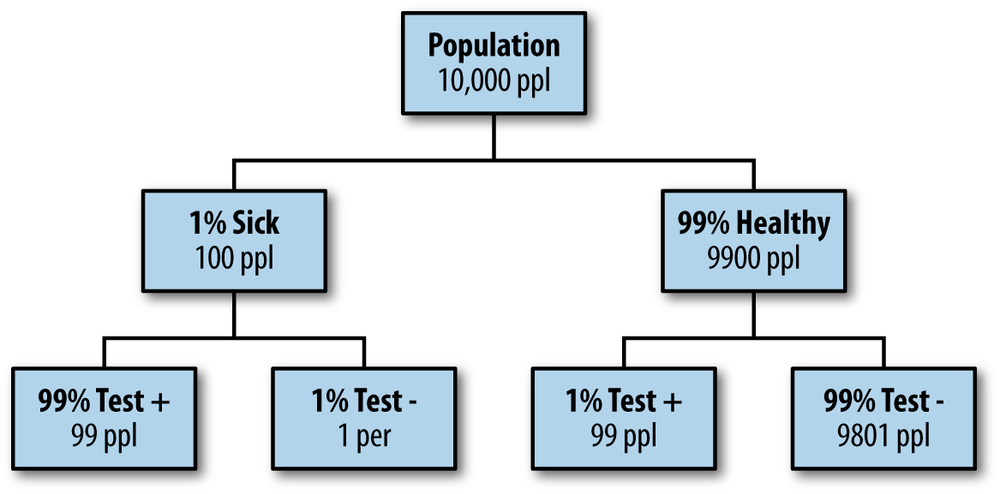

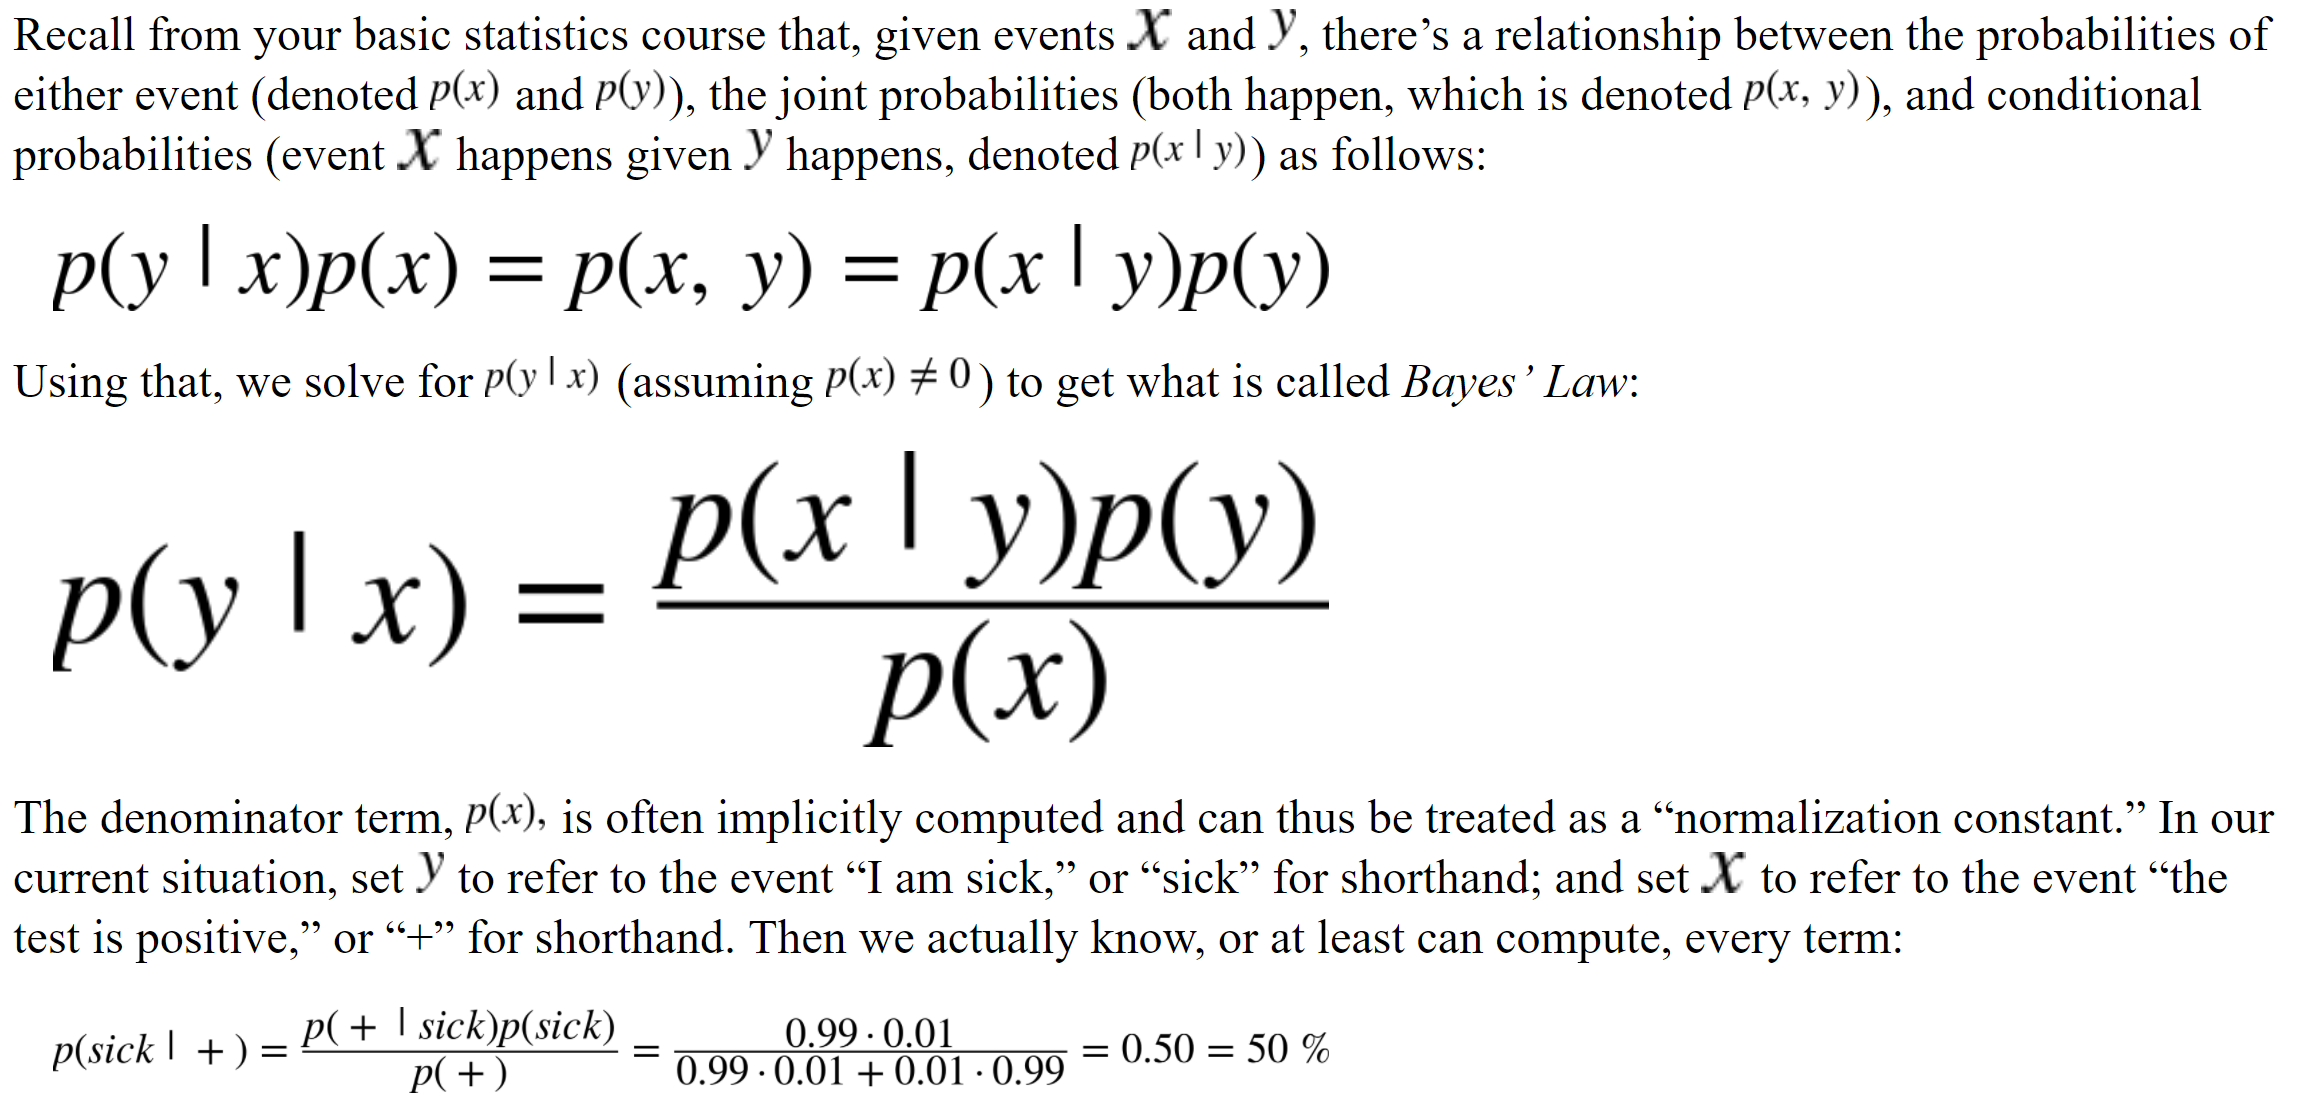

In [ ]:
#https://github.com/tidyverse/ggplot2/tree/master/data-raw
import csv

In [ ]:
# check first few liines to see the data
with open('resources/diamonds.csv') as csvfile:
    reader = csv.reader(csvfile)
    for i, row in enumerate(reader):
        print(row)
        if i > 5:
            break

Exercise 1. Write code to count rows that have color entry as 'E'

Exercise 2: Modify the code to count rows that have color entry as 'E' and cut entry as 'Ideal'

In [ ]:
cuts = []
colors = []
with open('resources/diamonds.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        cuts.append(row['cut'])
        colors.append(row['color'])

In [ ]:
colortypes = set(colors)
colortypes = sorted(colortypes)
print(colortypes)

cuttypes = set(cuts)
cuttypes = sorted(cuttypes)
print(cuttypes)

print(len(colors))
totalrec = len(colors)

In [ ]:
colorcut = list(zip(colors, cuts)) 

In [ ]:
for i,colori in enumerate(colortypes):
    print(i, colori) 

In [ ]:
for i,cuti in enumerate(cuttypes):
    print(i, cuti)
   

In [ ]:
countcc = {}
jtprob = np.ndarray((len(colortypes), len(cuttypes)))

for i, colori in enumerate(colortypes):
    for j, cuti in enumerate(cuttypes):
        count = len(list(filter(lambda x: x[0]==colori and x[1]==cuti, colorcut)))
        countcc[(colori, cuti)] = count
        jtprob[i, j] = count/totalrec

print(jtprob)

In [ ]:
# X color, Y cut  P(Y = Premium)
print(np.sum(jtprob[:, 3]))

In [ ]:
# X color, Y cut  P(X = 'G')
print(np.sum(jtprob[3, :]))

In [ ]:
# Conditional probability P(X=G|Y=Ideal)
# for this we need P(X = G  and Y = Ideal)   and P(Y = Ideal)
# P(X|Y) = P(XY)/P(Y)

pxy = jtprob[3,2]
py = np.sum(jtprob[:, 2])
pxy/py

# note that P(X=G) is 0.20934 which is less compared to conditional

Exercise 3: Calculate the conditional probability P(X=H | Y=Very Good)

Exercise 4: Calculate the probability P(X=F)